In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re, sys

# sklearn stuff
from sklearn.decomposition import PCA

# scipy stuff
from scipy.interpolate import interp1d

# my stuff
from preprocessingTR import *

%matplotlib inline

In [2]:
base = './Data/'

In [3]:
u_dict = generate_udict(base)

# Trials

In [25]:
frank = get_data(51, 5)

In [26]:
accelerometer_cols = [x for x in frank.columns if 'data' in x]
# gyroscope_cols = [x for x in a.columns if 'gyr' in x]

In [27]:
data = rot_trans(frank[accelerometer_cols].values)
acc_mag = (data ** 2).sum(axis=1) ** 0.5

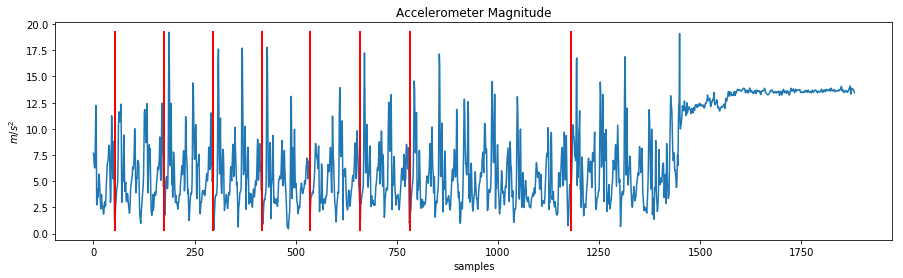

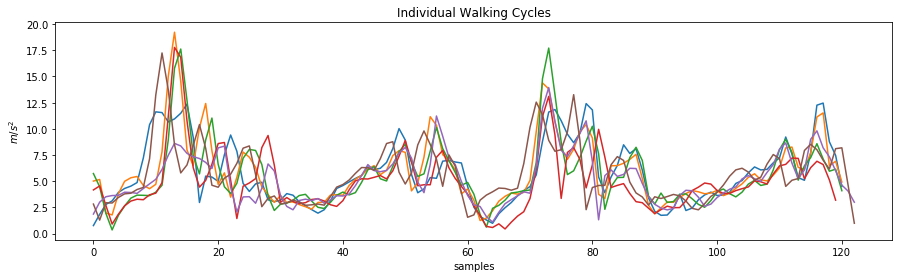

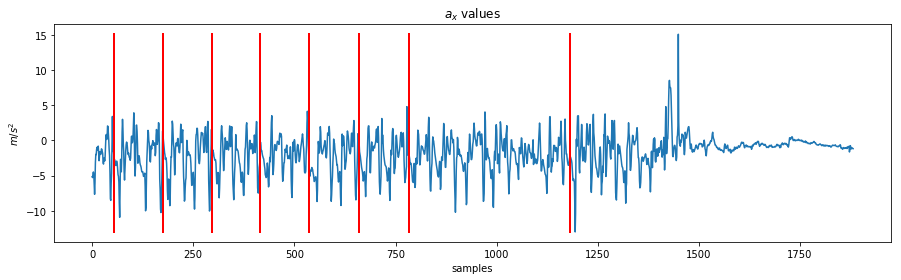

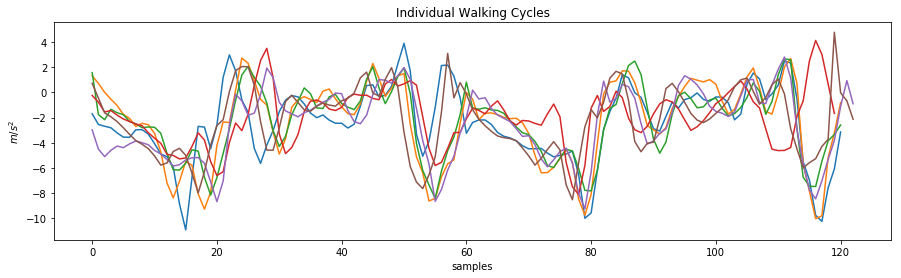

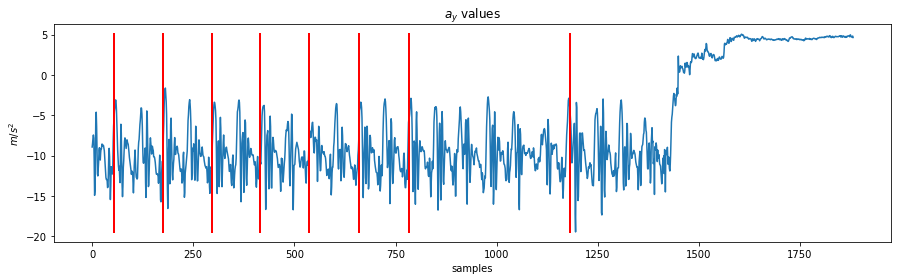

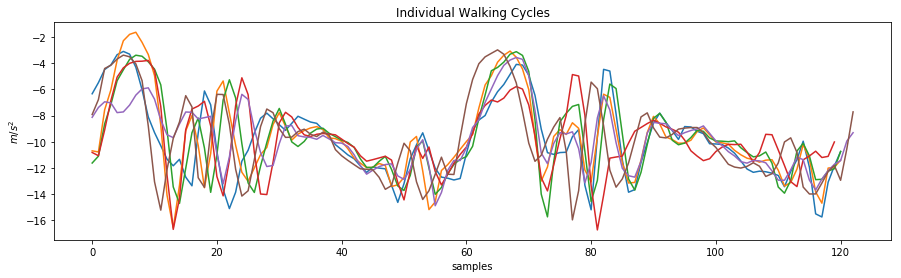

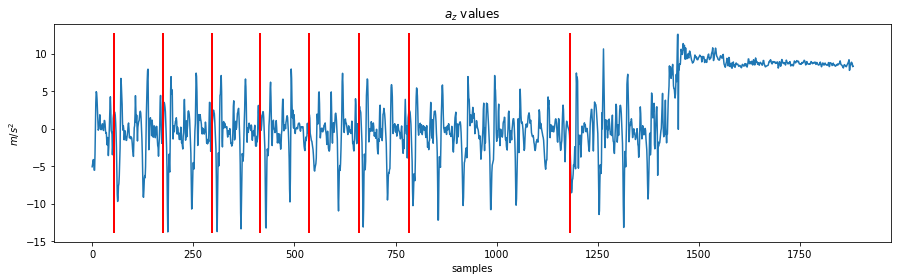

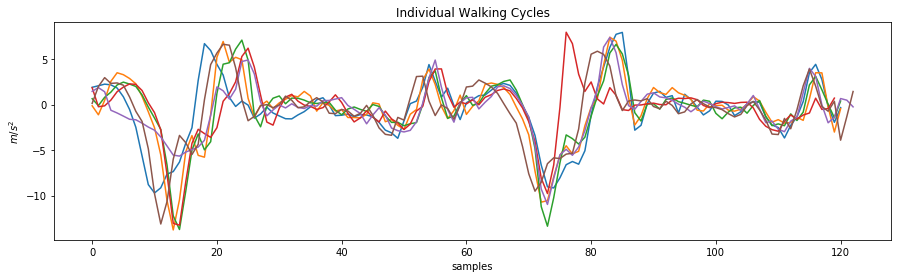

In [28]:
samples2 = acc_mag[500:5000]
starts = find_cycles(samples2)
starts2 = merge_consecutive_starts(starts, 2)
plot_steps(samples2, starts2)

x,y,z=frank[accelerometer_cols].values[500:5000, :].T
plot_steps(x, starts2, main_title='$a_x$ values')
plot_steps(y, starts2, main_title='$a_y$ values')
plot_steps(z, starts2, main_title='$a_z$ values')

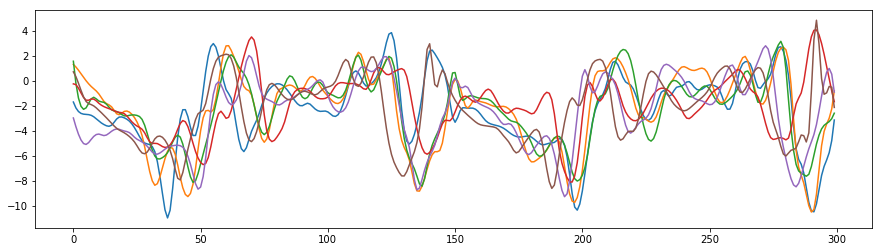

In [29]:
feats = extract_feats(x, starts2, filter_short=True)
feats_interp = interpolate_features(feats)
plt.figure(figsize=(15,4))
for row in feats_interp:
    plt.plot(row)

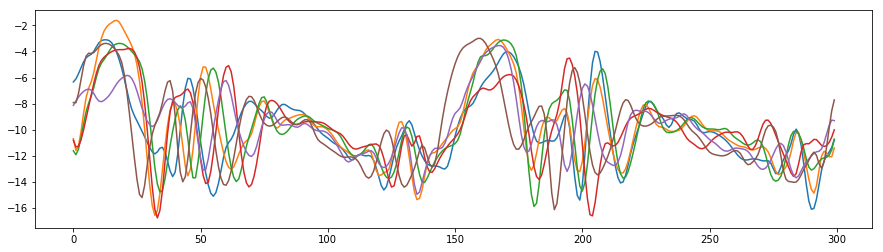

In [30]:
feats = extract_feats(y, starts2, filter_short=True)
feats_interp = interpolate_features(feats)
plt.figure(figsize=(15,4))
for row in feats_interp:
    plt.plot(row)

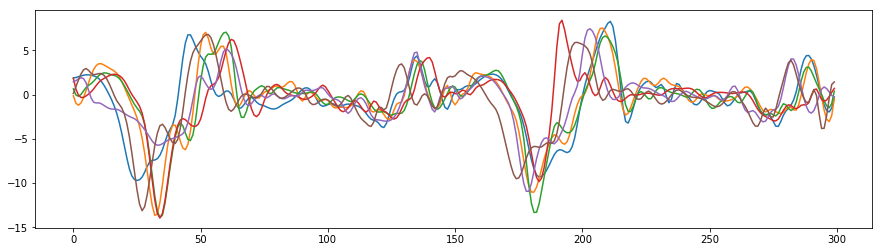

In [31]:
feats = extract_feats(z, starts2, filter_short=True)
feats_interp = interpolate_features(feats)
plt.figure(figsize=(15,4))
for row in feats_interp:
    plt.plot(row)

## VS

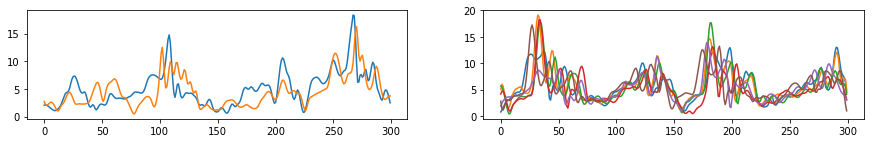

In [56]:
d1 = get_data(51, 7)
d2 = get_data(51, 5)

accelerometer_cols = [x for x in d1.columns if 'data' in x]

data1 = rot_trans(d1[accelerometer_cols].values)
acc_mag1 = (data1 ** 2).sum(axis=1) ** 0.5

data2 = rot_trans(d2[accelerometer_cols].values)
acc_mag2 = (data2 ** 2).sum(axis=1) ** 0.5

samples1 = acc_mag1[500:5000]
samples2 = acc_mag2[500:5000]

starts1 = merge_consecutive_starts(find_cycles(samples1), 2)
starts2 = merge_consecutive_starts(find_cycles(samples2), 2)

fig, axarr = plt.subplots(1, 2)
fig.set_figheight(2)
fig.set_figwidth(15)

feats = extract_feats(acc_mag1[500:5000], starts1, filter_short=True)
feats_interp = interpolate_features(feats)
for row in feats_interp:
    axarr[0].plot(row)
    
feats = extract_feats(acc_mag2[500:5000], starts2, filter_short=True)
feats_interp = interpolate_features(feats)
for row in feats_interp:
    axarr[1].plot(row)